In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
data_ir = pd.DataFrame(iris.data, columns=iris.feature_names)
data_iris_class = iris.target
#Оставим два признака - sepal_length и sepal_width
data_iris = data_ir[['sepal length (cm)', 'sepal width (cm)']]
data_iris['variety'] = data_iris_class #добавляем колонку с классом

<ipython-input-4-a173aa9854ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iris['variety'] = data_iris_class #добавляем колонку с классом


In [5]:
# импортируем LDA-функционал и разделяем данные на тренировочную и тестовую выборку
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_iris, data_iris_class, test_size=0.25)

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train) #обучаем данные

LinearDiscriminantAnalysis()

In [7]:
lda.predict(x_test) # делаем прогноз на тестовой выборке

array([2, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1,
       2, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 2])

In [8]:
#посмотрим разницу фактических данных и прогнозных
result = pd.DataFrame([y_test, lda.predict(x_test)]).T
result

,0,1
0,2,2
1,1,2
2,0,0
3,1,1
4,2,1
5,0,0
6,2,2
7,2,1
8,0,0
9,2,2


In [9]:
#посмотрим точность нашей модели
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(x_test))
#модель получилась не совсем точной

0.7894736842105263

In [10]:
# посмотрим центры
lda.means_

array([[5.03823529, 3.43235294, 0.        ],
       [5.83783784, 2.74054054, 1.        ],
       [6.51219512, 2.94634146, 2.        ]])

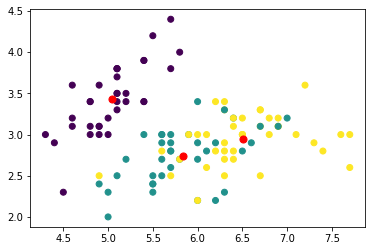

In [27]:
### визуализируем данные по классам
plt.scatter(x_train['sepal length (cm)'], x_train['sepal width (cm)'], c=y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=50, marker='o')
### HELP!!! Не совсем поняла по синтаксису, что значит lda.means_[:, 0], lda.means_[:, 1]?

In [14]:
from sklearn.cluster import KMeans
kmeans_iris = data_ir[['sepal length (cm)', 'sepal width (cm)']]

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(kmeans_iris)

In [23]:
# указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# присваиваем кластер
clusters = kmeans.fit_predict(kmeans_iris)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

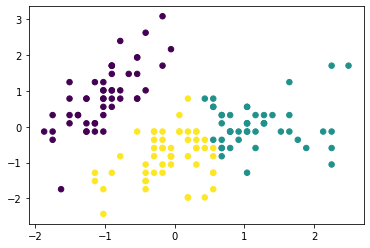

In [29]:
plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1], c=clusters, s=30)
#если сравнивать с визуализацией реальных данных, 1ый класс кластеризировался хорошо, а у 2-3 есть неточности